<a href="https://colab.research.google.com/github/aperfilyeva/anna_data601/blob/main/Project/hospital_analysis_ryan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#importing data
import pandas as pd
data = pd.read_excel('04232022_data_788_ryan.xlsx')
data

,Hospital_name,Drg_code,Min_contracted,Max_contracted,State,Zip,Quality,Beds,Public_flag,Teach,median_income,gini,max_min,proportion,ruca,rural_code
0,"Southern hills hospital medical center, las Vegas",788,786.000000,13980.000000,NV,89148,0,265,0,0,78352,0.3642,13194.000000,17.786260,1.0,urban
1,Mountain View Hospital,788,2863.000000,6554.000000,NV,89128,0,425,0,0,59045,0.4787,3691.000000,2.289207,1.0,urban
2,Dell Seton Medical Center at the University of...,788,1999.990000,4999.750000,TX,78701,0,211,1,1,127782,0.4836,2999.760000,2.499887,1.0,urban
3,Ascension Seton Medical Center Austin,788,2829.800000,7074.500000,TX,78705,0,391,0,1,23509,0.6579,4244.700000,2.500000,1.0,urban
4,Baylor Scott & White Emergency Hospitals,788,3229.600000,13468.310000,TX,76227,0,40,0,0,102020,0.3683,10238.710000,4.170272,2.1,urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Northwestern Memorial Hospital,788,8164.080000,34228.360000,IL,60611,1,903,0,1,108413,0.5301,26064.280000,4.192556,1.0,urban
104,Rush University Medical Center,788,6539.161717,23079.394295,IL,60612,1,671,0,1,44538,0.5911,16540.232578,3.529412,1.0,urban
105,NYU Langone Hospitals,788,7383.040000,61496.380000,NY,10016,1,1639,0,1,124647,0.5084,54113.340000,8.329412,1.0,urban
106,Penn Presbyterian Medical Center,788,7353.000000,115483.000000,PA,19104,1,365,0,1,28603,0.5822,108130.000000,15.705562,1.0,urban


In [5]:
#making the rural variable into a boolean, 1 is rural and 0 is urban
data['rural'] = ['1' if x == 'rural' else '0' for x in data['rural_code']]
data['price_range'] = data.Max_contracted- data.Min_contracted
data['mid_point'] = (data.Max_contracted+data.Min_contracted)/2

In [17]:
regression_variables = data[['Beds', 'Quality', 'Public_flag', 'Teach', 'median_income', 'gini', 'max_min', 'proportion', 'rural']]
corr = regression_variables.corr()

In [7]:
from statsmodels.compat import lzip
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

data1=data.query('proportion < 80')

#results = smf.ols("price_range ~ Quality+  Teach ", data=data).fit()
results = smf.ols("Min_contracted ~ Quality+ Beds + Teach + median_income + gini + rural ", data=data).fit()

# Inspect the results
print(results.summary())
#cls = Linear_Reg_Diagnostic(results)
#fig, ax = cls()


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:              mid_point   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     4.137
Date:                Tue, 03 May 2022   Prob (F-statistic):           0.000933
Time:                        19:45:36   Log-Likelihood:                -1121.9
No. Observations:                 108   AIC:                             2258.
Df Residuals:                     101   BIC:                             2277.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.299e+04   8111.453      1.602

In [19]:
#results = smf.ols("price_range ~ Quality+  Teach ", data=data).fit()
results = smf.ols("price_range ~ Quality+ Beds + Teach + median_income + gini + rural ", data=data).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            price_range   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     6.810
Date:                Tue, 03 May 2022   Prob (F-statistic):           0.000309
Time:                        20:28:05   Log-Likelihood:                -1193.4
No. Observations:                 108   AIC:                             2395.
Df Residuals:                     104   BIC:                             2405.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.113e+04   2286.086      4.871      0.0

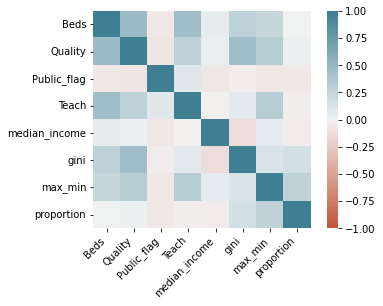

In [8]:
#making a heatmap of our variable correlations
import seaborn as sns
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

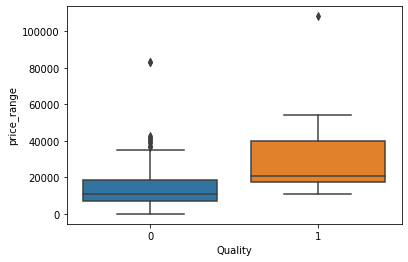

In [16]:
#boxplots - rural and proportion
sns.boxplot(x="Quality", y="price_range", data=data)
#sns.stripplot(x="Quality", y="price_range", data=data, color='grey', alpha=.5)

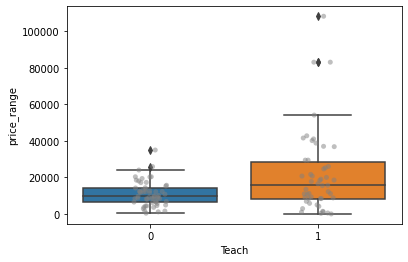

In [14]:
#boxplots - rural and proportion
sns.boxplot(x="Teach", y="price_range", data=data)
sns.stripplot(x="Teach", y="price_range", data=data, color='grey', alpha=.5)

count    108.000000
mean       4.857581
std        9.588196
min        1.010101
25%        2.061017
50%        3.077300
75%        4.744817
max       97.958103
Name: proportion, dtype: float64


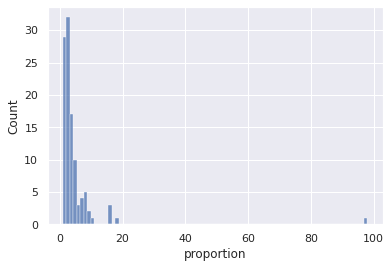

In [ ]:
#creating a histogram function and visualizing proportion
import matplotlib.pyplot as plt
def histogram_function(variable):
    sns.set(style="darkgrid")
    sns
    sns.histplot(data=data, x=variable)
    plt.show
    stats_numeric = data[variable].describe()
    print(stats_numeric)

histogram_function("proportion")    

In [ ]:
#looking at this as a possible outlier
high_proportion = data[data.proportion > 80]
high_proportion

,Hospital_name,Drg_code,Min_contracted,Max_contracted,State,Zip,Quality,Beds,Public_flag,Teach,median_income,gini,max_min,proportion,ruca,rural_code,rural,price_range,mid_point
68,St. Mary's Hospital,788,162.54,15922.11,GA,30606,0,181,0,0,50482,0.5722,15759.57,97.958103,1.0,urban,0,15759.57,8042.325


count    107.000000
mean       3.987483
std        3.204022
min        1.010101
25%        2.053801
50%        3.056079
75%        4.568505
max       17.786260
Name: proportion, dtype: float64


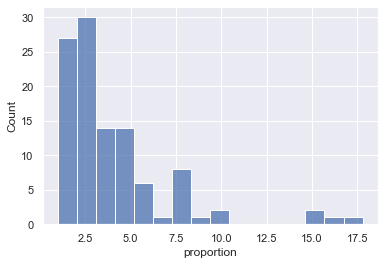

In [ ]:
#removing outlier for now at least and performing more exploratory data analysis - when running more charts 
    #the high proportion showed to be problematic and raised a lot of descriptive statistics estimates
data = data[data.proportion < 80]
histogram_function("proportion")


count       107.000000
mean      16133.849563
std       16812.426252
min          92.960000
25%        6930.000000
50%       11636.110000
75%       19257.660000
max      108130.000000
Name: max_min, dtype: float64


,Hospital_name,Drg_code,Min_contracted,Max_contracted,State,Zip,Quality,Beds,Public_flag,Teach,median_income,gini,max_min,proportion,ruca,rural_code,rural
20,Banner Desert Medical Center,788,5682.00,88712.90,AZ,85202,0,605,0,1,54047,0.4359,83030.90,15.612971,1.0,urban,0
23,Banner Ocotillo Medical Center,788,5682.00,88712.90,AZ,85284,0,124,0,1,127500,0.3798,83030.90,15.612971,1.0,urban,0
105,NYU Langone Hospitals,788,7383.04,61496.38,NY,10016,1,1639,0,1,124647,0.5084,54113.34,8.329412,1.0,urban,0
106,Penn Presbyterian Medical Center,788,7353.00,115483.00,PA,19104,1,365,0,1,28603,0.5822,108130.00,15.705562,1.0,urban,0


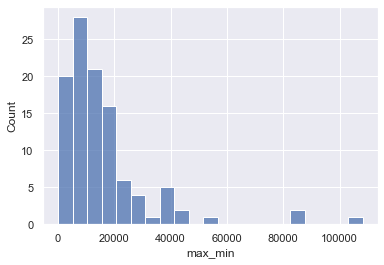

In [ ]:
#maximum contracted amount - minimum contracted amount
#after initially running, I actually spot-checked to make sure these were correct observations
histogram_function("max_min")
high_diff = data[data.max_min > 50000]
high_diff

count     107.000000
mean      284.392523
std       289.136214
min        19.000000
25%        97.000000
50%       188.000000
75%       389.000000
max      1639.000000
Name: Beds, dtype: float64


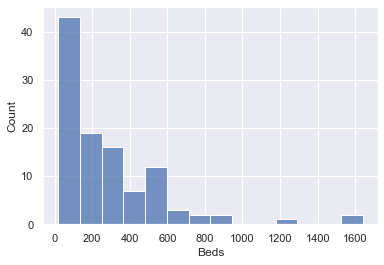

In [ ]:
#number of beds
histogram_function("Beds")

count    107.000000
mean       0.458990
std        0.057653
min        0.364200
25%        0.421150
50%        0.450300
75%        0.483050
max        0.657900
Name: gini, dtype: float64


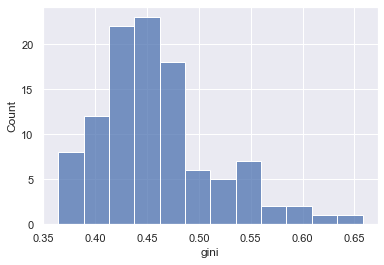

In [ ]:
#gini coefficient
histogram_function("gini")

count       107.000000
mean      70477.392523
std       27965.825177
min       23509.000000
25%       51483.500000
50%       61318.000000
75%       87025.500000
max      156280.000000
Name: median_income, dtype: float64


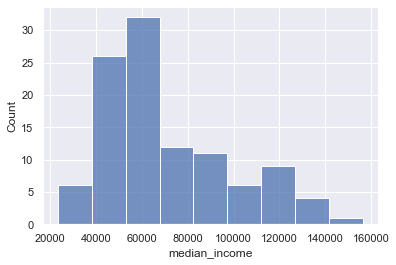

In [ ]:
#median income
histogram_function('median_income')

In [ ]:
#looking at data spread for geographic diversity of observations
state_groups = data.groupby('State').size()
state_groups

State
AL     2
AZ     7
CA    14
CO     4
CT     5
FL     3
ID     1
IL     2
IN     1
MA     6
ME     2
NH     2
NV     3
NY    12
OK     2
OR     9
PA     4
RI     1
SC     7
TN     2
TX     5
VA     5
VT     4
WA     2
WY     2
dtype: int64

In [ ]:
#looking at urban-rural split (ruca as defined by the USDA as being 4 and higher)
rural_groups = data.groupby('rural_code').size()
rural_groups

rural_code
rural    28
urban    79
dtype: int64

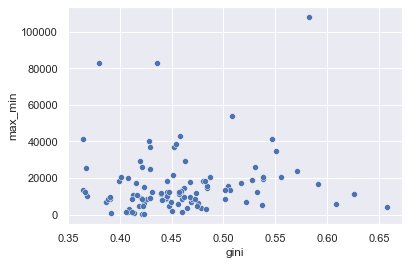

In [ ]:
#scatterplots - gini and max_min; maybe an ever so slightly positive correlation
sns.scatterplot(data=data, x="gini", y="max_min")

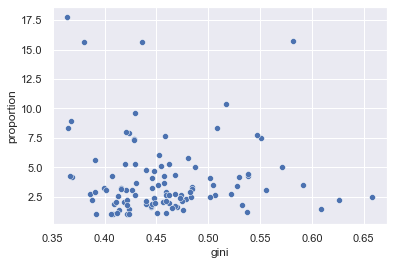

In [ ]:
#scatterplot - gini and proportion, slightly positive correlation perhaps, but weak
sns.scatterplot(data=data, x="gini", y="proportion")

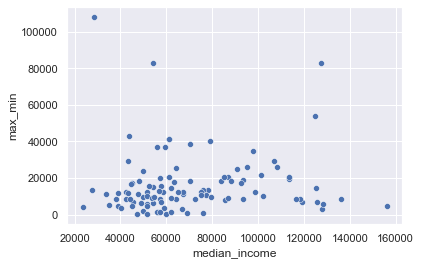

In [ ]:
#scatterplot - income and max_min - moderate positive correlation
sns.scatterplot(data=data, x="median_income", y="max_min")

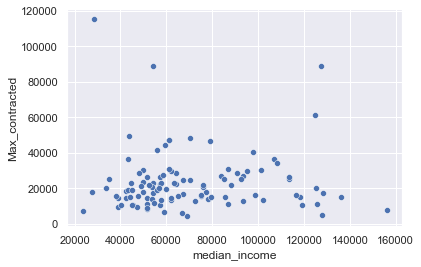

In [ ]:
#scatterpot - income and max_min
sns.scatterplot(data=data, x="median_income", y="Max_contracted")

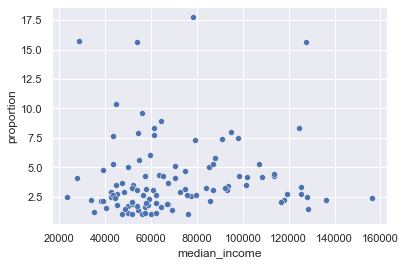

In [ ]:
#scatterplot - income and proportion- moderate positive correlation
sns.scatterplot(data=data, x="median_income", y="proportion")

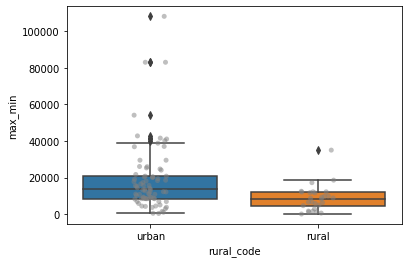

In [9]:
#boxplots - rural and max_min
sns.boxplot(x="rural_code", y="max_min", data=data)
sns.stripplot(x="rural_code", y="max_min", data=data, color='grey', alpha=.5)

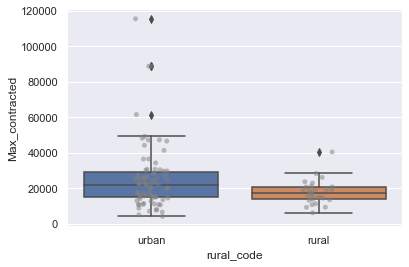

In [ ]:
#boxplots - rural and maximum contracted amount - urban is higher
sns.boxplot(x="rural_code", y="Max_contracted", data=data)
sns.stripplot(x="rural_code", y="Max_contracted", data=data, color='grey', alpha=.5)

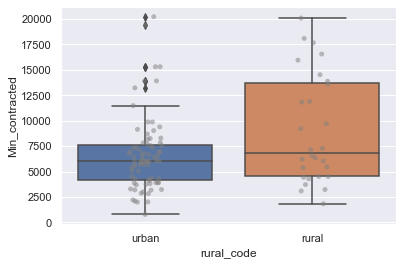

In [ ]:
#boxplots - rural and minimum contracted amount - rural is intrigueingly slightly higher and more dispersed
sns.boxplot(x="rural_code", y="Min_contracted", data=data)
sns.stripplot(x="rural_code", y="Min_contracted", data=data, color='grey', alpha=.5)

In [ ]:
# base code - taken from 
#https://www.statsmodels.org/devel/examples/notebooks/generated/linear_regression_diagnostics_plots.html
import statsmodels
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type

class Linear_Reg_Diagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance
        d. outliers
        e. high-leverage points
        f. collinearity

    Author:
        Prajwal Kafle (p33ajkafle@gmail.com, where 3 = r)
        Does not come with any sort of warranty.
        Please test the code one your end before using.
    """

    def __init__(self,
                 results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:

        a. residual
        b. qq
        c. scale location and
        d. leverage

        and a table

        e. vif

        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]):
                must be instance of statsmodels.regression.linear_model object

        Raises:
            TypeError: if instance does not belong to above object

        Example:
        >>> import numpy as np
        >>> import pandas as pd
        >>> import statsmodels.formula.api as smf
        >>> x = np.linspace(-np.pi, np.pi, 100)
        >>> y = 3*x + 8 + np.random.normal(0,1, 100)
        >>> df = pd.DataFrame({'x':x, 'y':y})
        >>> res = smf.ols(formula= "y ~ x", data=df).fit()
        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls(plot_context="seaborn-paper")

        In case you do not need all plots you can also independently make an individual plot/table
        in following ways

        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls.residual_plot()
        >>> cls.qq_plot()
        >>> cls.scale_location_plot()
        >>> cls.leverage_plot()
        >>> cls.vif_table()
        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)

    def __call__(self, plot_context='seaborn-paper'):
        # print(plt.style.available)
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(ax=ax[1,1])
            plt.show()

        self.vif_table()
        return fig, ax


    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot

        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict,
            y=self.residual,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.sort(residual_abs))
        abs_resid_top_3 = abs_resid[:3]
        for i, _ in enumerate(abs_resid_top_3):
            ax.annotate(
                i,
                xy=(self.y_predict[i], self.residual[i]),
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax

    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot

        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(self.residual_norm)
        QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for r, i in enumerate(abs_norm_resid_top_3):
            ax.annotate(
                i,
                xy=(np.flip(QQ.theoretical_quantiles, 0)[r], self.residual_norm[i]),
                ha='right', color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax

    def scale_location_plot(self, ax=None):
        """
        Sqrt(Standarized Residual) vs Fitted values plot

        Used to check homoscedasticity of the residuals.
        Horizontal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        residual_norm_abs_sqrt = np.sqrt(np.abs(self.residual_norm))

        ax.scatter(self.y_predict, residual_norm_abs_sqrt, alpha=0.5);
        sns.regplot(
            x=self.y_predict,
            y=residual_norm_abs_sqrt,
            scatter=False, ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        abs_sq_norm_resid = np.flip(np.argsort(residual_norm_abs_sqrt), 0)
        abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
        for i in abs_sq_norm_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], residual_norm_abs_sqrt[i]),
                color='C3')
        ax.set_title('Scale-Location', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$');
        return ax

    def leverage_plot(self, ax=None):
        """
        Residual vs Leverage plot

        Points falling outside Cook's distance curves are considered observation that can sway the fit
        aka are influential.
        Good to have none outside the curves.
        """
        if ax is None:
            fig, ax = plt.subplots()

        ax.scatter(
            self.leverage,
            self.residual_norm,
            alpha=0.5);

        sns.regplot(
            x=self.leverage,
            y=self.residual_norm,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        leverage_top_3 = np.flip(np.argsort(self.cooks_distance), 0)[:3]
        for i in leverage_top_3:
            ax.annotate(
                i,
                xy=(self.leverage[i], self.residual_norm[i]),
                color = 'C3')

        xtemp, ytemp = self.__cooks_dist_line(0.5) # 0.5 line
        ax.plot(xtemp, ytemp, label="Cook's distance", lw=1, ls='--', color='red')
        xtemp, ytemp = self.__cooks_dist_line(1) # 1 line
        ax.plot(xtemp, ytemp, lw=1, ls='--', color='red')

        ax.set_xlim(0, max(self.leverage)+0.01)
        ax.set_title('Residuals vs Leverage', fontweight="bold")
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        ax.legend(loc='upper right')
        return ax

    def vif_table(self):
        """
        VIF table

        VIF, the variance inflation factor, is a measure of multicollinearity.
        VIF > 5 for a variable indicates that it is highly collinear with the
        other input variables.
        """
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        print(vif_df
                .sort_values("VIF Factor")
                .round(2))


    def __cooks_dist_line(self, factor):
        """
        Helper function for plotting Cook's distance curves
        """
        p = self.nparams
        formula = lambda x: np.sqrt((factor * p * (1 - x)) / x)
        x = np.linspace(0.001, max(self.leverage), 50)
        y = formula(x)
        return x, y

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data.tail()

,Hospital_name,Drg_code,Min_contracted,Max_contracted,State,Zip,Quality,Beds,Public_flag,Teach,median_income,gini,max_min,proportion,ruca,rural_code,rural,price_range
103,Northwestern Memorial Hospital,788,8164.080000,34228.360000,IL,60611,1,903,0,1,108413,0.5301,26064.280000,4.192556,1.0,urban,0,26064.280000
104,Rush University Medical Center,788,6539.161717,23079.394295,IL,60612,1,671,0,1,44538,0.5911,16540.232578,3.529412,1.0,urban,0,16540.232578
105,NYU Langone Hospitals,788,7383.040000,61496.380000,NY,10016,1,1639,0,1,124647,0.5084,54113.340000,8.329412,1.0,urban,0,54113.340000
106,Penn Presbyterian Medical Center,788,7353.000000,115483.000000,PA,19104,1,365,0,1,28603,0.5822,108130.000000,15.705562,1.0,urban,0,108130.000000
107,Mount Sinai New York,788,9022.000000,20027.000000,NY,10029,1,1183,0,1,33801,0.6263,11005.000000,2.219796,1.0,urban,0,11005.000000


In [ ]:
print(data)